In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import *
from matplotlib import cm
# e es la carga elemental, m_p es la masa del proton
#from scipy.constants import e, m_p

### Condiciones iniciales

In [2]:
# Definimos el campo magnetico como B = 0.05T k
B = np.array([[0.0,0.0,8]])
# v_inicial = 2 m/s j 
v_inicial = np.array([[0.0, 2.0, 0.0]])
posicion_inicial = np.array([[0.0, 0.0, 0.0]])
t_inicial = 0
delta_t = 0.01
e = 5
m_p = 2

In [3]:
t = 0.0
trayectoria = np.array([[0.0, 0.0, 0.0]])
aceleracion = np.array([[0.0, 0.0, 0.0]])
velocidad = np.array([[0.0, 2.0, 0.0]])

In [4]:
def fuerza(q, v, B):
    return q*np.cross(v, B)

In [5]:
def mover_carga(v, F, m, dt):
    return v + dt*(F/m)

In [6]:
def f(pos, v, dt):
    return pos + v*dt

In [15]:
def runge_kutta_cuarto_orden(pos, v, dt):
    k1 = dt*(pos[0,1] + v[:-1]*dt)
    k2 = dt*((pos[:-1]+(dt/2))+((v[:-1]*dt)+k1/2))
    #k2 = dt*f(pos + (dt/2), v + k1/2, dt)
    #print(pos+(dt/2))
    k3 = dt*((pos[:-1]+(dt/2))+((v[:-1]*dt)+k2/2))
    #k3 = dt*f(pos + (dt/2), v + k2/2, dt)
    k4 = dt*((pos[:-1]+dt)+((v[:-1]*dt)+k3))
    #k4 = dt*f(pos + dt, v + k3, dt)
    return pos[:-1] + (k1/6)+(k2/3)+(k3/3)+(k4/6)

In [16]:
#Evaluamos el sistema a la primera posicion 
F_1 = fuerza(e, v_inicial, B)
#print(F_1)
v_1 = mover_carga(v_inicial, F_1, m_p, delta_t)
rk4 = runge_kutta_cuarto_orden(posicion_inicial, v_inicial, delta_t)
trayectoria = np.append(trayectoria, rk4, axis=0)

[0.]


In [9]:
y = trayectoria[1,1]
v_anterior = v_actual = v_1
i = 2
while y >= 0:
    f = fuerza(e, v_anterior, B)
    v_anterior = v_actual
    v_actual = mover_carga(v_anterior, f, m_p, delta_t)
    posicion_actual = runge_kutta_cuarto_orden(trayectoria[i-1,:], v_anterior, delta_t)
    trayectoria = np.append(trayectoria, posicion_actual, axis=0)
    y = trayectoria[i, 1]
    #print("fuerza", f)
    #print("v:ant", v_anterior)
    #print("v_act", v_actual)
    #print("tra", trayectoria)
    t += delta_t
    i += 1

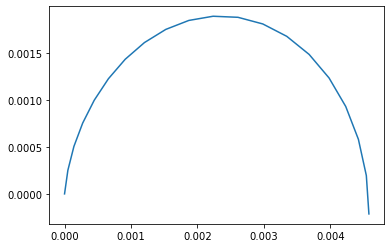

In [10]:
plt.plot(trayectoria[:,0], trayectoria[:,1])